# Step Testing

## Reference materials

* Alizadeh, Esmaeil. "A Guide to Non-Minimum Phase Systems." *Towards Data Science.* https://towardsdatascience.com/a-guide-to-non-minimum-phase-systems-1403350917a0. Accessed 6 Decewmber 2020.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from tclab import TCLab, clock, Historian, Plotter

## Executing the Step Test

### Verify an Initial Steady State

A step test assumes the system is initially at steady state. In the case of the Temperature Control Lab, the initial steady with no power input would be room temperature. It generally takes 10 minutes or more to reach steady state. We'll do a measurement to confirm the initial temperature.

In [3]:
lab = TCLab()
print(lab.T1, lab.T1)
lab.close()

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem2101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
26.06 26.06
TCLab disconnected successfully.


### Conduct the Experiment

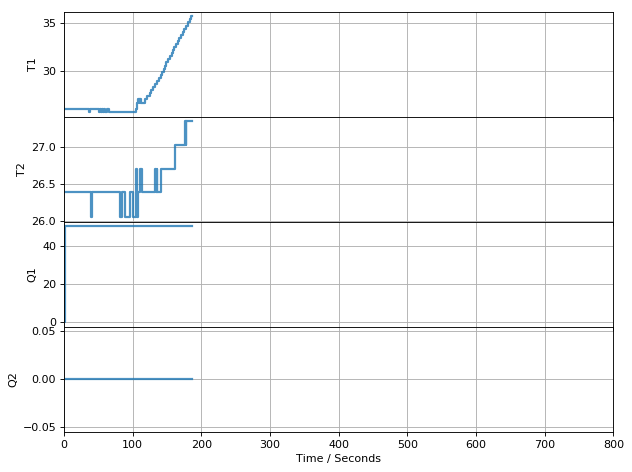

SerialException: write failed: [Errno 6] Device not configured

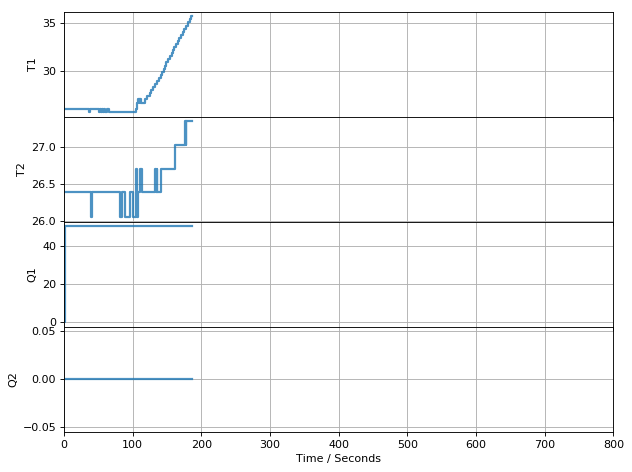

In [4]:
# experimental parameters
Q1 = 50
tfinal = 800

# perform experiment
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    lab.Q1(0)
    for t in clock(tfinal):
        p.update(t)
        lab.Q1(Q1)

### Verify the Experimental Data

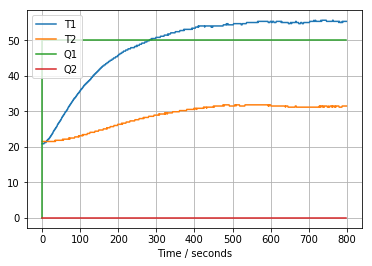

In [3]:
t = h.t
T1 = h.T1
T2 = h.T2
Q1 = h.Q1
Q2 = h.Q2

plt.plot(t, T1, t, T2, t, Q1, t, Q2)
plt.legend(['T1','T2','Q1','Q2'])
plt.xlabel('time / seconds')
plt.grid()

### Convert to a DataFrame

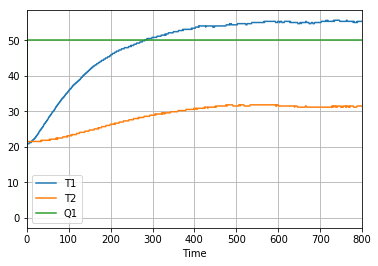

In [4]:
import pandas as pd

df = pd.DataFrame([t, T1, T2, Q1]).T
df.columns = ['Time', 'T1', 'T2', 'Q1']
df = df.set_index('Time')
df.plot(grid=True)

### Save DataFrame as a .csv file

In [5]:
df.to_csv('Step_Test_Data.csv')

### Verify the Data File

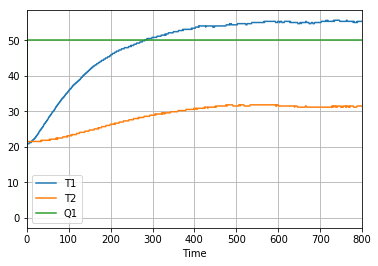

In [2]:
%matplotlib inline

pd.read_csv('Step_Test_Data.csv').set_index('Time').plot(grid=True)

In [7]:
df.head()

T1     T2    Q1
Time                   
0.0   20.9  21.54   0.0
0.0   20.9  21.54  50.0
1.0   20.9  21.54  50.0
2.0   20.9  21.54  50.0
3.0   20.9  21.54  50.0

In [8]:
df.tail()

T1     T2    Q1
Time                      
795.00  55.38  31.53  50.0
796.00  55.38  31.53  50.0
797.00  55.38  31.53  50.0
798.01  55.38  31.53  50.0
799.00  55.38  31.53  50.0